In [1]:
import numpy as np
import networkx as nx

# A = np.array([[0, 1, 0, 1, 1], 
#               [1, 0, 1, 0, 1], 
#               [0, 1, 0, 0, 0], 
#               [1, 0, 0, 0, 1], 
#               [1, 1, 0, 1, 0]])

A = np.array([[0, 1, 1, 0, 0], 
              [1, 0, 1, 1, 0], 
              [1, 1, 0, 1, 0], 
              [0, 1, 1, 0, 1], 
              [0, 0, 0, 1, 0]])

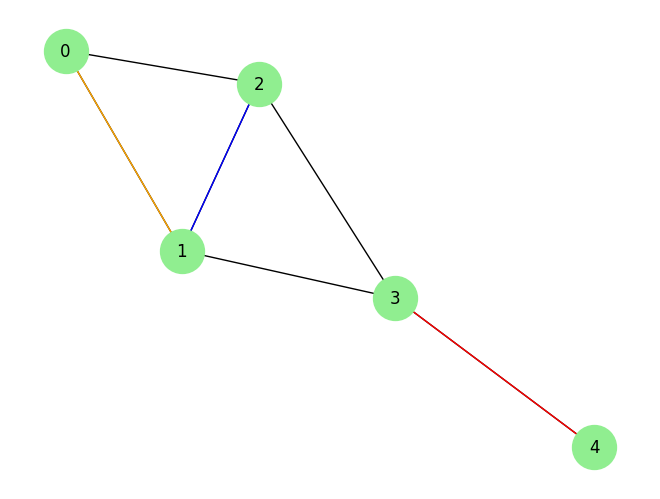

In [38]:
G = nx.Graph(A)

special_edges = [(1, 2), (0, 1), (3, 4)]  # 変えたいエッジのリスト
special_edge_colors = ['blue','orange', 'red']  # 各エッジの色

# pos = nx.circular_layout(G)
pos = nx.spring_layout(G)

# pos = nx.spring_layout(G, k=0.5)
nx.draw(G,pos, with_labels=True, node_color='lightgreen', edge_color='black', node_size=1000)


for edge, color in zip(special_edges, special_edge_colors):
    # print(edge)
    # print(color)
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=color, width=G[edge[0]][edge[1]]['weight'])
    # nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=color)
    
    # nx.draw_networkx_edges(G, , edgelist=[edge], edge_color=color, width=G[edge[0]][edge[1]]['weight'])
    

In [13]:
# 次数行列
D = np.diag(np.sum(A, axis=1))

# グラフラプラシアン
L = D - A

# 単位行列
I = np.eye(len(A))

In [39]:
# 正規化グラフラプラシアン

D_1_2 = np.sqrt(D)
D_minus_1_2 = np.linalg.inv(D_1_2)



L_norm = D_minus_1_2 @ L @ D_minus_1_2

L_norm

array([[ 1.        , -0.40824829, -0.40824829,  0.        ,  0.        ],
       [-0.40824829,  1.        , -0.33333333, -0.33333333,  0.        ],
       [-0.40824829, -0.33333333,  1.        , -0.33333333,  0.        ],
       [ 0.        , -0.33333333, -0.33333333,  1.        , -0.57735027],
       [ 0.        ,  0.        ,  0.        , -0.57735027,  1.        ]])

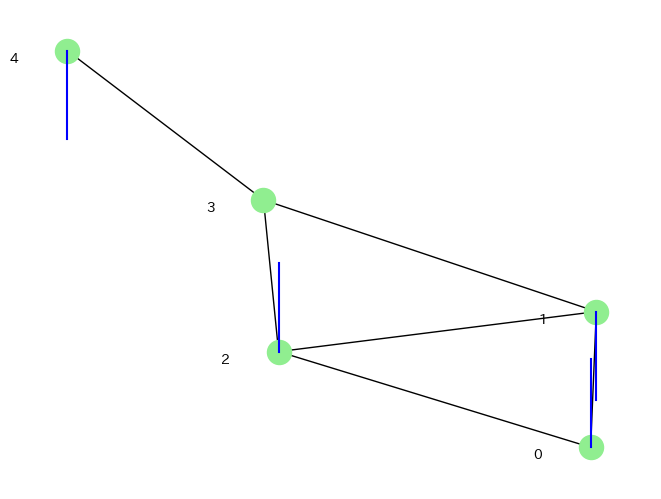

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import random

# 信号値を設定

# sanmple1
signal = {0: 1, 
          1: -1, 
          2: 1, 
          3: 0, 
          4: -1}

# # sanmple2
# signal = {0: 1, 
#           1: 1, 
#           2: 1, 
#           3: 1, 
#           4: 1}


# sanmple3
# signal = {0: 1, 
#           1: -1, 
#           2: 0, 
#           3: 1, 
#           4: -1}



# 図の作成
nx.draw(G, pos, node_color='lightgreen', with_labels=False) 

# 各ノードから信号値に応じた長さの線を描画
for n in G.nodes():
    x,y = pos[n] 
    # plt.plot([x,x],[y,y+0.3*signal[n]], color='blue')
    plt.plot([x,x],[y,y+0.4*signal[n]], color='blue')
    
    plt.text(x-0.08, y-0.05, str(n)) # 追加
    
plt.show()

# plt.axis('off')
# plt.savefig("graph_signal.png") # 画像として保存

In [44]:
before = I + D_minus_1_2 @ A @ D_minus_1_2

In [43]:
A_hat = A + I
D_hat = np.diag(np.sum(A_hat, axis=1))
D_hat_minus_1_2 = np.linalg.inv(np.sqrt(D_hat))

after = D_hat_minus_1_2 @ A_hat @ D_hat_minus_1_2

In [45]:
before

array([[1.        , 0.40824829, 0.40824829, 0.        , 0.        ],
       [0.40824829, 1.        , 0.33333333, 0.33333333, 0.        ],
       [0.40824829, 0.33333333, 1.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.33333333, 1.        , 0.57735027],
       [0.        , 0.        , 0.        , 0.57735027, 1.        ]])

In [46]:
after

array([[0.33333333, 0.28867513, 0.28867513, 0.        , 0.        ],
       [0.28867513, 0.25      , 0.25      , 0.25      , 0.        ],
       [0.28867513, 0.25      , 0.25      , 0.25      , 0.        ],
       [0.        , 0.25      , 0.25      , 0.25      , 0.35355339],
       [0.        , 0.        , 0.        , 0.35355339, 0.5       ]])

In [48]:
np.linalg.eig(before).eigenvalues

array([0.23240812, 0.66666667, 2.        , 1.43425855, 0.66666667])

In [49]:
np.linalg.eig(after).eigenvalues

array([ 1.00000000e+00,  6.61690686e-01, -2.20892660e-01,  1.42535307e-01,
       -2.18222304e-32])